In [2]:
import numpy as np
from matplotlib import pyplot as plt, rcParams, patches as mpt

rcParams["font.size"] = 8
rcParams["font.family"] = "Roboto Condensed"

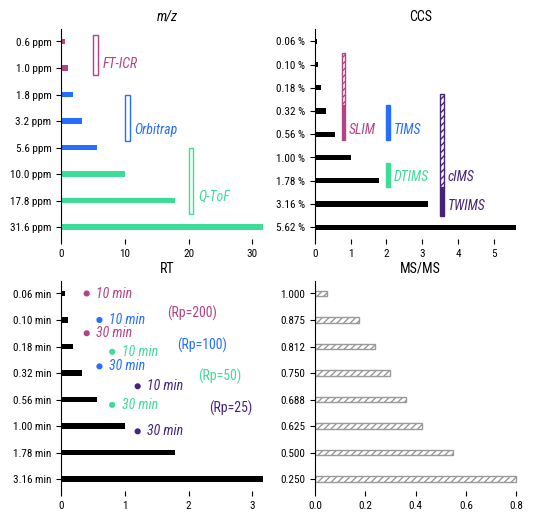

In [7]:
mz_ppms = np.array([0.6, 1.0, 1.8, 3.2, 5.6, 10.0, 17.8, 31.6])
ccs_percents = np.array([0.06, 0.10, 0.18, 0.32, 0.56, 1.00, 1.78, 3.16, 5.62])
rt_tols = np.array([0.06, 0.10, 0.18, 0.32, 0.56, 1.00, 1.78, 3.16])
ms2_tols = np.array([1.000, 0.875, 0.8125, 0.750, 0.6875, 0.625, 0.500, 0.250])

# define some colors
cs = {
    "fticr": "#B54285",
    "orbi": "#256EFF",
    "qtof": "#3DDC97",
    "tw": "#46237A",
    "dt": "#3DDC97",
    "tims": "#256EFF",
    "slim": "#B54285",
    "rp200": "#B54285",
    "rp100": "#256EFF",
    "rp50": "#3DDC97",
    "rp25": "#46237A",
}

# define some parameters for scaling/sizing things
h_mult = 0.025
lbl_w_tl = 0.75
lbl_w_tr = 0.1
lbl_w_bl = 0.075
lbl_h_bl = 0.175


fig, ((ax_mz, ax_ccs), (ax_rt, ax_br)) = plt.subplots(ncols=2, nrows=2, figsize=(6, 6))
# m/z
mz_x = [_ for _ in range(len(mz_ppms), 0, -1)]
ax_mz.barh(mz_x, mz_ppms, height=h_mult * len(mz_ppms), color=[
    cs["fticr"], cs["fticr"], 
    cs["orbi"], cs["orbi"], cs["orbi"],
    cs["qtof"], cs["qtof"], cs["qtof"]
])
ax_mz.set_yticks(mz_x)
ax_mz.set_yticklabels([f"{_:.1f} ppm" for _ in mz_ppms])
# FT-ICR
ax_mz.add_patch(mpt.Rectangle((5., 6.75), lbl_w_tl, 1.5, facecolor="w", edgecolor=cs["fticr"]))
ax_mz.text(5. + 2 * lbl_w_tl, 7, "FT-ICR", size=10, color=cs["fticr"], fontstyle="italic")
# Orbitrap
ax_mz.add_patch(mpt.Rectangle((10., 4.25), lbl_w_tl, 1.75, facecolor="w", edgecolor=cs["orbi"]))
ax_mz.text(10. + 2 * lbl_w_tl, 4.5, "Orbitrap", size=10, color=cs["orbi"], fontstyle="italic")
# Q-ToF
ax_mz.add_patch(mpt.Rectangle((20., 1.5), lbl_w_tl, 2.5, facecolor="w", edgecolor=cs["qtof"]))
ax_mz.text(20. + 2 * lbl_w_tl, 2., "Q-ToF", size=10, color=cs["qtof"], fontstyle="italic")
# CCS
ccs_y = [_ for _ in range(len(ccs_percents), 0, -1)]
ax_ccs.barh(ccs_y, ccs_percents, height=h_mult * len(ccs_percents), color="k")
ax_ccs.set_yticks(ccs_y)
ax_ccs.set_yticklabels([f"{_:.2f} %" for _ in ccs_percents])
# DTIMS
ax_ccs.add_patch(mpt.Rectangle((2., 2.75), lbl_w_tr, 1., facecolor=cs["dt"], edgecolor=cs["dt"]))
ax_ccs.text(2. + 2 * lbl_w_tr, 3., "DTIMS", size=10, color=cs["dt"], fontstyle="italic")
# TWIMS
ax_ccs.add_patch(mpt.Rectangle((3.5, 1.5), lbl_w_tr, 1.25, facecolor=cs["tw"], edgecolor=cs["tw"]))
ax_ccs.text(3.5 + 2 * lbl_w_tr, 1.75, "TWIMS", size=10, color=cs["tw"], fontstyle="italic")
# TWIMS (cyclic)
ax_ccs.add_patch(mpt.Rectangle((3.5, 2.75), lbl_w_tr, 4, edgecolor=cs["tw"], facecolor="w", hatch="/////"))
ax_ccs.text(3.5 + 2 * lbl_w_tr, 3., "cIMS", size=10, color=cs["tw"], fontstyle="italic")
# TIMS
ax_ccs.add_patch(mpt.Rectangle((2., 4.75), lbl_w_tr, 1.5, facecolor=cs["tims"], edgecolor=cs["tims"]))
ax_ccs.text(2. + 2 * lbl_w_tr, 5., "TIMS", size=10, color=cs["tims"], fontstyle="italic")
# SLIM
ax_ccs.add_patch(mpt.Rectangle((0.75, 4.75), lbl_w_tr, 1.5, edgecolor=cs["slim"], facecolor=cs["slim"]))
ax_ccs.add_patch(mpt.Rectangle((0.75, 6.25), lbl_w_tr, 2.25, edgecolor=cs["slim"], facecolor="w", hatch="/////"))
ax_ccs.text(0.75 + 2 * lbl_w_tr, 5., "SLIM", size=10, color=cs["slim"], fontstyle="italic")
# RT
rt_y = [_ for _ in range(len(rt_tols), 0, -1)]
ax_rt.barh(rt_y, rt_tols, height=h_mult * len(rt_tols), color="k")
ax_rt.set_yticks(rt_y)
ax_rt.set_yticklabels([f"{_:.2f} min" for _ in rt_tols])
# resolving power 200 (10 and 30 min)
ax_rt.add_patch(mpt.Ellipse((0.4, 8.), lbl_w_bl, lbl_h_bl, color=cs["rp200"]))
ax_rt.text(0.4 + 2 * lbl_w_bl, 8., "10 min", size=10, color=cs["rp200"], fontstyle="italic", va="center")
ax_rt.add_patch(mpt.Ellipse((0.4, 6.5), lbl_w_bl, lbl_h_bl, color=cs["rp200"]))
ax_rt.text(0.4 + 2 * lbl_w_bl, 6.5, "30 min", size=10, color=cs["rp200"], fontstyle="italic", va="center")
# resolving power 100 (10 and 30 min)
ax_rt.add_patch(mpt.Ellipse((0.6, 7.), lbl_w_bl, lbl_h_bl, color=cs["rp100"]))
ax_rt.text(0.6 + 2 * lbl_w_bl, 7., "10 min", size=10, color=cs["rp100"], fontstyle="italic", va="center")
ax_rt.add_patch(mpt.Ellipse((0.6, 5.25), lbl_w_bl, lbl_h_bl, color=cs["rp100"]))
ax_rt.text(0.6 + 2 * lbl_w_bl, 5.25, "30 min", size=10, color=cs["rp100"], fontstyle="italic", va="center")
# resolving power 50 (10 and 30 min)
ax_rt.add_patch(mpt.Ellipse((0.8, 5.8), lbl_w_bl, lbl_h_bl, color=cs["rp50"]))
ax_rt.text(0.8 + 2 * lbl_w_bl, 5.8, "10 min", size=10, color=cs["rp50"], fontstyle="italic", va="center")
ax_rt.add_patch(mpt.Ellipse((0.8, 3.8), lbl_w_bl, lbl_h_bl, color=cs["rp50"]))
ax_rt.text(0.8 + 2 * lbl_w_bl, 3.8, "30 min", size=10, color=cs["rp50"], fontstyle="italic", va="center")
# resolving power 25 (10 and 30 min)
ax_rt.add_patch(mpt.Ellipse((1.2, 4.5), lbl_w_bl, lbl_h_bl, color=cs["rp25"]))
ax_rt.text(1.2 + 2 * lbl_w_bl, 4.5, "10 min", size=10, color=cs["rp25"], fontstyle="italic", va="center")
ax_rt.add_patch(mpt.Ellipse((1.2, 2.8), lbl_w_bl, lbl_h_bl, color=cs["rp25"]))
ax_rt.text(1.2 + 2 * lbl_w_bl, 2.8, "30 min", size=10, color=cs["rp25"], fontstyle="italic", va="center")
# resolving power labels
ax_rt.text(0.5, 0.825, "(Rp=200)", size=10, color=cs["rp200"], transform=ax_rt.transAxes)
ax_rt.text(0.55, 0.675, "(Rp=100)", size=10, color=cs["rp100"], transform=ax_rt.transAxes)
ax_rt.text(0.65, 0.525, "(Rp=50)", size=10, color=cs["rp50"], transform=ax_rt.transAxes)
ax_rt.text(0.7, 0.375, "(Rp=25)", size=10, color=cs["rp25"], transform=ax_rt.transAxes)
# MS2
ms2_y = [_ for _ in range(len(ms2_tols), 0, -1)]
ax_br.barh(ms2_y, 1.05 - ms2_tols, height=h_mult * len(ms2_tols), color="w", edgecolor="#999999", hatch="/////")
ax_br.set_yticks(rt_y)
ax_br.set_yticklabels([f"{_:.3f}" for _ in ms2_tols])
# add plot titles
ax_mz.set_title("m/z", size=10, fontstyle="italic", fontweight="bold")
ax_ccs.set_title("CCS", size=10, fontweight="bold")
ax_rt.set_title("RT", size=10, fontweight="bold")
ax_br.set_title("MS/MS", size=10, fontweight="bold")
# get rid of extra spines / ticks
for ax in [ax_mz, ax_ccs, ax_rt, ax_br]:
    for d in ["top", "right", "bottom"]:
        ax.spines[d].set_visible(False)
plt.savefig("_figures/property_search_tolerances.png", dpi=400, bbox_inches="tight")
plt.show()
plt.close()

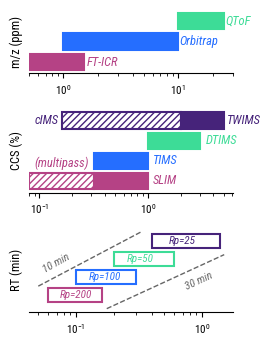

In [81]:
mz_ppms = np.array([0.6, 1.0, 1.8, 3.2, 5.6, 10.0, 17.8, 31.6])
ccs_percents = np.array([0.06, 0.10, 0.18, 0.32, 0.56, 1.00, 1.78, 3.16, 5.62])
rt_tols = np.array([0.06, 0.10, 0.18, 0.32, 0.56, 1.00, 1.78, 3.16])
ms2_tols = np.array([1.000, 0.875, 0.8125, 0.750, 0.6875, 0.625, 0.500, 0.250])

# define some colors
cs = {
    "fticr": "#B54285",
    "orbi": "#256EFF",
    "qtof": "#3DDC97",
    "tw": "#46237A",
    "dt": "#3DDC97",
    "tims": "#256EFF",
    "slim": "#B54285",
    "rp200": "#B54285",
    "rp100": "#256EFF",
    "rp50": "#3DDC97",
    "rp25": "#46237A",
}

# define some parameters for scaling/sizing things
ht = 0.75
lw = 1.5

fig, (ax_mz, ax_ccs, ax_rt) = plt.subplots(nrows=3, figsize=(2.75, 3.5), height_ratios=(3, 4, 4))
# m/z
ax_mz.set_yticks([])
ax_mz.set_ylabel("m/z (ppm)", size=9, fontweight="bold")
ax_mz.set_xscale("log")
ax_mz.barh(y=1, width=1., left=0.5, facecolor=cs["fticr"], edgecolor=cs["fticr"], linewidth=lw)
ax_mz.text(1.58, 1, "FT-ICR", size=9, color=cs["fticr"], fontstyle="italic", va="center")
ax_mz.barh(y=2, width=9., left=1.0, facecolor=cs["orbi"], edgecolor=cs["orbi"], linewidth=lw)
ax_mz.text(10.3, 2, "Orbitrap", size=9, color=cs["orbi"], fontstyle="italic", va="center")
ax_mz.barh(y=3, width=15., left=10.0, facecolor=cs["qtof"], edgecolor=cs["qtof"], linewidth=lw)
ax_mz.text(26, 3, "QToF", size=9, color=cs["qtof"], fontstyle="italic", va="center")
# CCS
ax_ccs.set_yticks([])
ax_ccs.set_ylabel("CCS (%)", size=9, fontweight="bold")
ax_ccs.set_xscale("log")
ax_ccs.barh(y=1, width=0.24, left=0.08, facecolor="w", edgecolor=cs["slim"], linewidth=lw, hatch="/////")
ax_ccs.barh(y=1, width=0.68, left=0.32, facecolor=cs["slim"], edgecolor=cs["slim"], linewidth=lw)
ax_ccs.text(1.1, 1, "SLIM", size=9, color=cs["slim"], fontstyle="italic", va="center")
ax_ccs.text(0.09, 1.9, "(multipass)", size=9, color=cs["slim"], fontstyle="italic", va="center")
ax_ccs.barh(y=2, width=0.68, left=0.32, facecolor=cs["tims"], edgecolor=cs["tims"], linewidth=lw)
ax_ccs.text(1.1, 2, "TIMS", size=9, color=cs["tims"], fontstyle="italic", va="center")
ax_ccs.barh(y=3, width=2., left=1., facecolor=cs["dt"], edgecolor=cs["dt"], linewidth=lw)
ax_ccs.text(3.4, 3, "DTIMS", size=9, color=cs["dt"], fontstyle="italic", va="center")
ax_ccs.barh(y=4, width=1.84, left=0.16, facecolor="w", edgecolor=cs["tw"], linewidth=lw, hatch="/////")
ax_ccs.barh(y=4, width=3, left=2, facecolor=cs["tw"], edgecolor=cs["tw"], linewidth=lw)
ax_ccs.text(5.4, 4, "TWIMS", size=9, color=cs["tw"], fontstyle="italic", va="center")
ax_ccs.text(0.15, 4, "cIMS", size=9, color=cs["tw"], fontstyle="italic", va="center", ha="right")
# RT
ax_rt.set_yticks([])
ax_rt.set_ylabel("RT (min)", size=9, fontweight="bold")
ax_rt.set_xscale("log")
ax_rt.barh(y=1, width=0.1, left=0.06, facecolor="w", edgecolor=cs["rp200"], linewidth=lw)
ax_rt.text(0.1, 1, "Rp=200", size=8, color=cs["rp200"], fontstyle="italic", va="center", ha="center")
ax_rt.barh(y=2, width=0.2, left=0.1, facecolor="w", edgecolor=cs["rp100"], linewidth=lw)
ax_rt.text(0.17, 2, "Rp=100", size=8, color=cs["rp100"], fontstyle="italic", va="center", ha="center")
ax_rt.barh(y=3, width=0.4, left=0.2, facecolor="w", edgecolor=cs["rp50"], linewidth=lw)
ax_rt.text(0.32, 3, "Rp=50", size=8, color=cs["rp50"], fontstyle="italic", va="center", ha="center")
ax_rt.barh(y=4, width=1.0, left=0.4, facecolor="w", edgecolor=cs["rp25"], linewidth=lw)
ax_rt.text(0.7, 4, "Rp=25", size=8, color=cs["rp25"], fontstyle="italic", va="center", ha="center")
ax_rt.plot([0.05, 0.325], [1.5, 4.5], ls="--", c="#666666", lw=1.)
ax_rt.plot([0.175, 1.5], [0.25, 3.25], ls="--", c="#666666", lw=1.)
ax_rt.text(0.07, 2.75, "10 min", size=8, color="#666666", fontstyle="italic", va="center", ha="center", rotation=29)
ax_rt.text(0.95, 1.8, "30 min", size=8, color="#666666", fontstyle="italic", va="center", ha="center", rotation=25)
# get rid of extra spines / ticks
for ax in [ax_mz, ax_ccs, ax_rt]:
    for d in ["top", "right", "left"]:
        ax.spines[d].set_visible(False)
plt.tight_layout()
plt.savefig("_figures/property_search_tolerances_new.png", dpi=400, bbox_inches="tight")
plt.show()
plt.close()